# Plot

Fetch the evaluation result:

In [1]:
import os
import json

results = []
folders = os.listdir("../result")
folders.sort()
for folder in folders:
    # Get result file
    d = os.listdir("../result/" + folder)[0]
    if d.startswith("results") is not True: 
        d = os.listdir("../result/" + folder)[1]

    # Read the result
    path = f"../result/{folder}/{d}"
    with open(path, "r") as f:
        result = json.load(f)
        score = result["results"]["medmcqa"]["acc,none"]
        if folder == "Llama3.1-8B-Instruct-hf":
            baseline = score
        else:
            ckpt_num = int(folder.split('-')[-1])
            results.append([f"{ckpt_num:0=4d}", score])
            
results.sort()
checkpoints, scores = zip(*results)
checkpoints = list(checkpoints)
scores = list(scores)

Merge the result as one json file:

In [4]:
# Save results as an jsonl file
import json
with open("../result/LLaMA3.1-8B-Chat_lora_medmcqa.json", "w") as f:
    f.write("{\n")
    for c, s in zip(checkpoints, scores):
        f.write(f"  \"ckpt-{c}\": {s}, \n")
    f.write("}")

Plot:

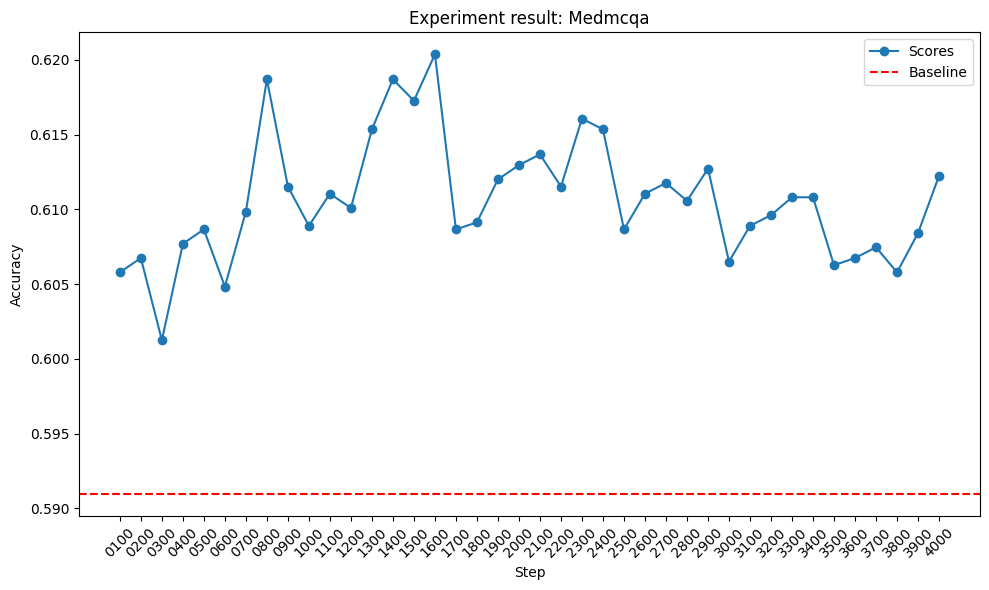

In [22]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(checkpoints, scores, marker='o', label='Scores')
plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline')

# Adding titles and labels
plt.title('Experiment result: Medmcqa')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Fetch the data of training:

In [5]:
import json
trainer_log_path = "../saves/LLaMA3.1-8B-Chat/lora/trainer_log.jsonl"

with open(trainer_log_path, "r") as f:
    results = [json.loads(l) for l in f.readlines()]
    losses = [r["loss"] for r in results]
    lrs = [r["learning_rate"] for r in results] 
    steps = [r["current_steps"] for r in results]   


Plot loss:

/tmp/ipykernel_347069/1400133011.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


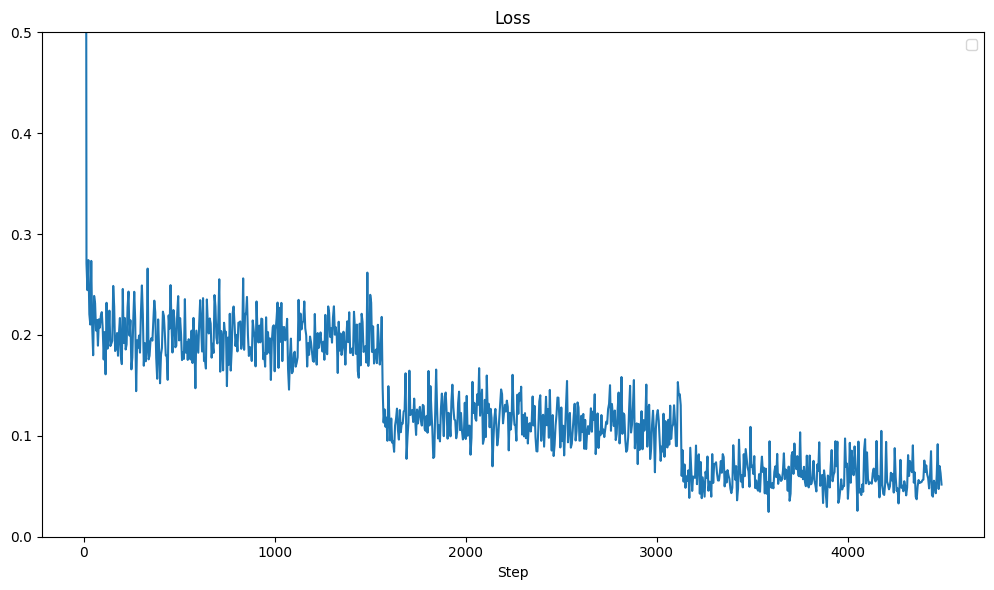

In [6]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(steps, losses)

# Adding titles and labels
plt.title('Loss')
plt.xlabel('Step')
plt.legend()

# Display the plot
plt.tight_layout()
plt.ylim([0, 0.5])
plt.show()

Plot learning rate:

/tmp/ipykernel_278163/2434483361.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


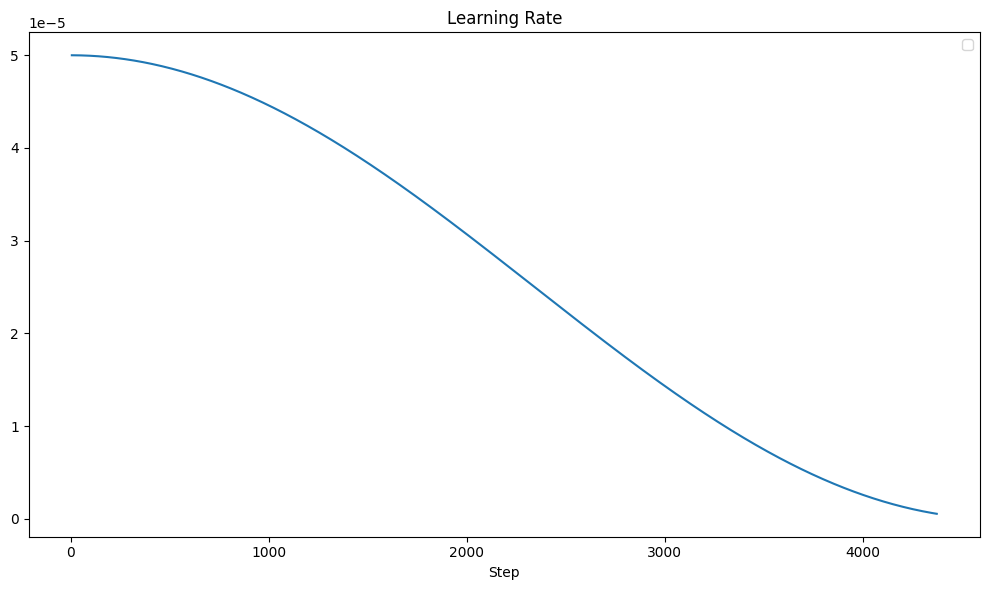

In [16]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(steps, lrs)

# Adding titles and labels
plt.title('Learning Rate')
plt.xlabel('Step')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()